# Lab: Running SQL Queries in Python with SQLite and pandas
**Objective**: In this lab, you'll learn how to connect to a SQLite database in Python, run SQL queries, and analyze the results using pandas.

## Part 1 – Connect to SQLite and Explore Tables

In [ ]:
# Import required libraries
import sqlite3
import pandas as pd

In [ ]:
# Connect to the Chinook database
conn = sqlite3.connect('/content/chinook.db')  # Ensure the chinook.db file is in the working directory

In [ ]:
# Get the list of all table names in the database
# Method1
query = "SELECT name FROM sqlite_master WHERE type='table'"
tables = pd.read_sql_query(query, conn)
tables
# Method 2
# tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
# tables

,name
0,albums
1,sqlite_sequence
2,artists
3,customers
4,employees
5,genres
6,invoices
7,invoice_items
8,media_types
9,playlists


In [ ]:
# Preview data from the 'customers' table first five rows
query = "SELECT * FROM customers LIMIT 5; "
df = pd.read_sql_query (query, conn)
df

,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
0,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
1,2,Leonie,Köhler,None,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,+49 0711 2842222,None,leonekohler@surfeu.de,5
2,3,François,Tremblay,None,1498 rue Bélanger,Montréal,QC,Canada,H2G 1A7,+1 (514) 721-4711,None,ftremblay@gmail.com,3
3,4,Bjørn,Hansen,None,Ullevålsveien 14,Oslo,None,Norway,0171,+47 22 44 22 22,None,bjorn.hansen@yahoo.no,4
4,5,František,Wichterlová,JetBrains s.r.o.,Klanova 9/506,Prague,None,Czech Republic,14700,+420 2 4172 5555,+420 2 4172 5555,frantisekw@jetbrains.com,4


In [ ]:
# Importing interactive Google Sheets
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/17ykLhsFO67XzwKqPIjaY9bYBAcYQlQJ5qYRLyJqgHE0/edit#gid=0


## Part 2 – Apply SQL Queries in Python

In [ ]:
# Load and display employees located in Canada and Calgary
query1="""
SELECT * FROM employees
WHERE Country = 'Canada' AND City = 'Calgary';
"""
df1=pd.read_sql_query(query1,conn)
df1

,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,2,Edwards,Nancy,Sales Manager,1,1958-12-08 00:00:00,2002-05-01 00:00:00,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
1,3,Peacock,Jane,Sales Support Agent,2,1973-08-29 00:00:00,2002-04-01 00:00:00,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
2,4,Park,Margaret,Sales Support Agent,2,1947-09-19 00:00:00,2003-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
3,5,Johnson,Steve,Sales Support Agent,2,1965-03-03 00:00:00,2003-10-17 00:00:00,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com
4,6,Mitchell,Michael,IT Manager,1,1973-07-01 00:00:00,2003-10-17 00:00:00,5827 Bowness Road NW,Calgary,AB,Canada,T3B 0C5,+1 (403) 246-9887,+1 (403) 246-9899,michael@chinookcorp.com


In [ ]:
# Count the number of customers by country
query = """
SELECT Country, COUNT(*) AS NumberOfCustomers
FROM customers
GROUP BY Country;
"""
pd.read_sql_query(query, conn)
#The triple quotes allow you to write the SQL query just like you would in a SQL editor—across multiple lines.
#Without triple quotes, you would need to use long single-line strings with \n, which is harder to read and maintain.
# You can use either ''' or """ for multi-line strings in Python—they work the same way. Just stay consistent.



,Country,NumberOfCustomers
0,Argentina,1
1,Australia,1
2,Austria,1
3,Belgium,1
4,Brazil,5
5,Canada,8
6,Chile,1
7,Czech Republic,2
8,Denmark,1
9,Finland,1


In [ ]:
query3 = """
select * From invoices;"""
df4 = pd.read_sql_query(query3,conn)
df4

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,1,2,2009-01-01 00:00:00,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,1.98
1,2,4,2009-01-02 00:00:00,Ullevålsveien 14,Oslo,None,Norway,0171,3.96
2,3,8,2009-01-03 00:00:00,Grétrystraat 63,Brussels,None,Belgium,1000,5.94
3,4,14,2009-01-06 00:00:00,8210 111 ST NW,Edmonton,AB,Canada,T6G 2C7,8.91
4,5,23,2009-01-11 00:00:00,69 Salem Street,Boston,MA,USA,2113,13.86
...,...,...,...,...,...,...,...,...,...
407,408,25,2013-12-05 00:00:00,319 N. Frances Street,Madison,WI,USA,53703,3.96
408,409,29,2013-12-06 00:00:00,796 Dundas Street West,Toronto,ON,Canada,M6J 1V1,5.94
409,410,35,2013-12-09 00:00:00,"Rua dos Campeões Europeus de Viena, 4350",Porto,None,Portugal,None,8.91
410,411,44,2013-12-14 00:00:00,Porthaninkatu 9,Helsinki,None,Finland,00530,13.86


In [ ]:
# Total amount spent per billing country
query2 ="""
select BillingCountry,sum(total) AS total From invoices
GROUP BY BillingCountry
order by total
limit 7;
"""
df3 = pd.read_sql_query(query2, conn)
df3

,BillingCountry,total
0,Belgium,37.62
1,Spain,37.62
2,Argentina,37.62
3,Australia,37.62
4,Denmark,37.62
5,Italy,37.62
6,Poland,37.62


## Part 3 – Join and Analyze Tables

In [ ]:
# Join customers and invoices to show customer names and invoice totals
query = """
SELECT customers.FirstName, customers.LastName, invoices.InvoiceDate, invoices.Total
FROM customers
INNER JOIN invoices ON customers.CustomerId = invoices.CustomerId;
"""
pd.read_sql_query(query, conn)

,FirstName,LastName,InvoiceDate,Total
0,Luís,Gonçalves,2010-03-11 00:00:00,3.98
1,Luís,Gonçalves,2010-06-13 00:00:00,3.96
2,Luís,Gonçalves,2010-09-15 00:00:00,5.94
3,Luís,Gonçalves,2011-05-06 00:00:00,0.99
4,Luís,Gonçalves,2012-10-27 00:00:00,1.98
...,...,...,...,...
407,Puja,Srivastava,2009-07-08 00:00:00,5.94
408,Puja,Srivastava,2010-02-26 00:00:00,1.99
409,Puja,Srivastava,2011-08-20 00:00:00,1.98
410,Puja,Srivastava,2011-09-30 00:00:00,13.86


In [ ]:
# Join invoices, invoice_items, and tracks to show invoice details
query = """
SELECT invoices.InvoiceId, tracks.Name AS TrackName, invoice_items.UnitPrice, invoice_items.Quantity
FROM invoices
INNER JOIN invoice_items ON invoices.InvoiceId = invoice_items.InvoiceId
INNER JOIN tracks ON invoice_items.TrackId = tracks.TrackId;
"""
pd.read_sql_query(query, conn)

,InvoiceId,TrackName,UnitPrice,Quantity
0,98,Experiment In Terra,1.99,1
1,98,Take the Celestra,1.99,1
2,121,Shout It Out Loud,0.99,1
3,121,Calling Dr. Love,0.99,1
4,121,Strutter,0.99,1
...,...,...,...,...
2235,284,Esporrei Na Manivela,0.99,1
2236,284,No Fundo Do Quintal Da Escola,0.99,1
2237,284,Que Luz É Essa,0.99,1
2238,284,The Power Of Equality,0.99,1


In [ ]:
q="SELECT * From customers"
pd.read_sql_query(q,conn)

,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
0,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
1,2,Leonie,Köhler,None,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,+49 0711 2842222,None,leonekohler@surfeu.de,5
2,3,François,Tremblay,None,1498 rue Bélanger,Montréal,QC,Canada,H2G 1A7,+1 (514) 721-4711,None,ftremblay@gmail.com,3
3,4,Bjørn,Hansen,None,Ullevålsveien 14,Oslo,None,Norway,0171,+47 22 44 22 22,None,bjorn.hansen@yahoo.no,4
4,5,František,Wichterlová,JetBrains s.r.o.,Klanova 9/506,Prague,None,Czech Republic,14700,+420 2 4172 5555,+420 2 4172 5555,frantisekw@jetbrains.com,4
5,6,Helena,Holý,None,Rilská 3174/6,Prague,None,Czech Republic,14300,+420 2 4177 0449,None,hholy@gmail.com,5
6,7,Astrid,Gruber,None,"Rotenturmstraße 4, 1010 Innere Stadt",Vienne,None,Austria,1010,+43 01 5134505,None,astrid.gruber@apple.at,5
7,8,Daan,Peeters,None,Grétrystraat 63,Brussels,None,Belgium,1000,+32 02 219 03 03,None,daan_peeters@apple.be,4
8,9,Kara,Nielsen,None,Sønder Boulevard 51,Copenhagen,None,Denmark,1720,+453 3331 9991,None,kara.nielsen@jubii.dk,4
9,10,Eduardo,Martins,Woodstock Discos,"Rua Dr. Falcão Filho, 155",São Paulo,SP,Brazil,01007-010,+55 (11) 3033-5446,+55 (11) 3033-4564,eduardo@woodstock.com.br,4


In [ ]:
# Show invoice totals grouped by artist
query = """
SELECT artists.Name AS ArtistName, SUM(invoices.Total) AS TotalRevenue
FROM customers
INNER JOIN invoices ON customers.CustomerId = invoices.CustomerId
INNER JOIN invoice_items ON invoices.InvoiceId = invoice_items.InvoiceId
INNER JOIN tracks ON invoice_items.TrackId = tracks.TrackId
INNER JOIN albums ON tracks.AlbumId = albums.AlbumId
INNER JOIN artists ON albums.ArtistId = artists.ArtistId
GROUP BY artists.Name
ORDER BY TotalRevenue DESC
LIMIT 10;
"""
pd.read_sql_query(query, conn)

,ArtistName,TotalRevenue
0,Iron Maiden,1233.54
1,U2,895.59
2,Lost,833.70
3,Led Zeppelin,620.73
4,Metallica,599.94
5,Deep Purple,550.44
6,Pearl Jam,408.87
7,Lenny Kravitz,372.51
8,Van Halen,336.82
9,The Office,328.80


## Part 4 – Visualize SQL Output with Python

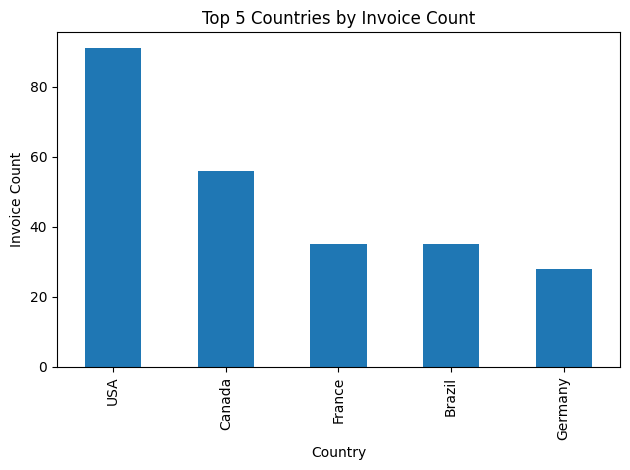

In [ ]:
# Bar chart: Top 5 countries by number of invoices
import matplotlib.pyplot as plt

query = """
SELECT BillingCountry, COUNT(*) AS InvoiceCount
FROM invoices
GROUP BY BillingCountry
ORDER BY InvoiceCount DESC
LIMIT 5;
"""
df = pd.read_sql_query(query, conn)
df.plot(kind='bar', x='BillingCountry', y='InvoiceCount', legend=False)
plt.title("Top 5 Countries by Invoice Count")
plt.ylabel("Invoice Count")
plt.xlabel("Country")
plt.tight_layout()
plt.show()

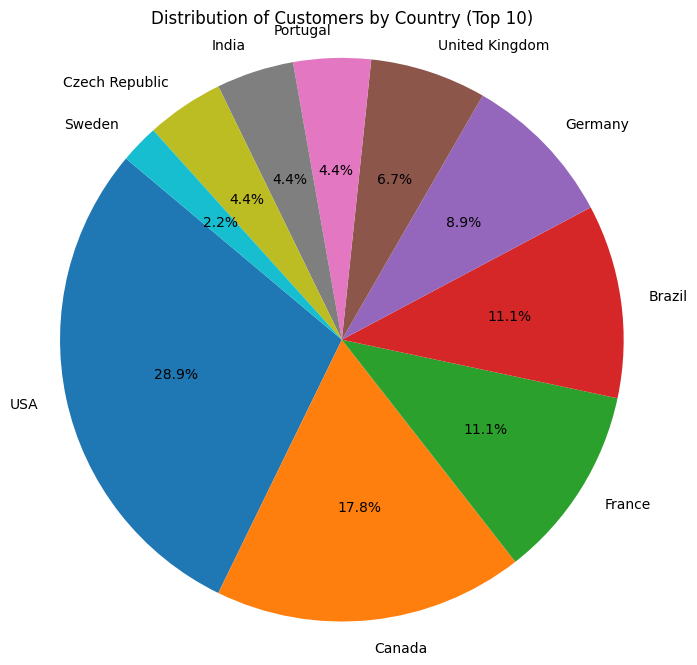

In [ ]:
# Pie chart: Distribution of customers by country (top 10)
query = """
SELECT Country, COUNT(*) AS NumberOfCustomers
FROM customers
GROUP BY Country
ORDER BY NumberOfCustomers DESC
LIMIT 10;
"""
df_customers = pd.read_sql_query(query, conn)

plt.figure(figsize=(8, 8))
plt.pie(df_customers['NumberOfCustomers'], labels=df_customers['Country'], autopct='%1.1f%%', startangle=140)
plt.title("Distribution of Customers by Country (Top 10)")
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

<Figure size 1000x600 with 0 Axes>

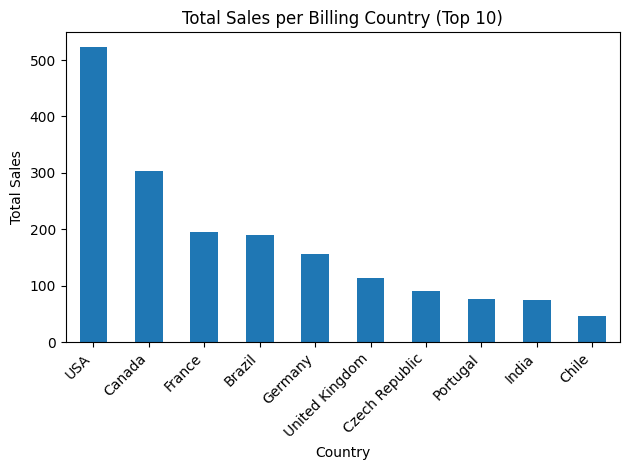

In [ ]:
# Bar chart: Total sales per billing country (top 10)
query = """
SELECT BillingCountry, SUM(Total) AS TotalSpent
FROM invoices
GROUP BY BillingCountry
ORDER BY TotalSpent DESC
LIMIT 10;
"""
df_sales = pd.read_sql_query(query, conn)

plt.figure(figsize=(10, 6))
df_sales.plot(kind='bar', x='BillingCountry', y='TotalSpent', legend=False)
plt.title("Total Sales per Billing Country (Top 10)")
plt.ylabel("Total Sales")
plt.xlabel("Country")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


<Figure size 1200x700 with 0 Axes>

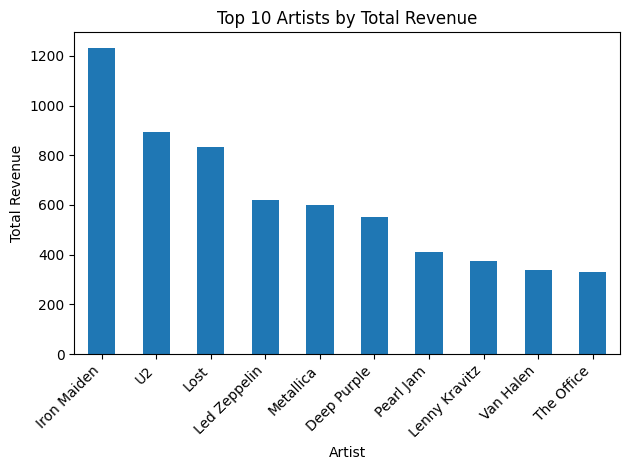

In [ ]:
# Bar chart: Top 10 artists by total revenue (already calculated in the previous code)
query = """
SELECT artists.Name AS ArtistName, SUM(invoices.Total) AS TotalRevenue
FROM customers
INNER JOIN invoices ON customers.CustomerId = invoices.CustomerId
INNER JOIN invoice_items ON invoices.InvoiceId = invoice_items.InvoiceId
INNER JOIN tracks ON invoice_items.TrackId = tracks.TrackId
INNER JOIN albums ON tracks.AlbumId = albums.AlbumId
INNER JOIN artists ON albums.ArtistId = artists.ArtistId
GROUP BY artists.Name
ORDER BY TotalRevenue DESC
LIMIT 10;
"""
df_artist_revenue = pd.read_sql_query(query, conn)

plt.figure(figsize=(12, 7))
df_artist_revenue.plot(kind='bar', x='ArtistName', y='TotalRevenue', legend=False)
plt.title("Top 10 Artists by Total Revenue")
plt.ylabel("Total Revenue")
plt.xlabel("Artist")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Lab Wrap-up

In [ ]:
# Close the connection to the database
conn.close()